# Exploratory Data Analysis
- This section performs exploratory data analysis of the dataset 
- I analyze demographics such as sex, age, and education, along with economic variables such as consumption and income
- The unit of observation is the **household head**, the manager of the household

### Results
- More densely popululated areas have higher levels of education.
- The younger generation has higher levels of education than older generations.

In [145]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import os; home = os.path.expanduser('~')
import sys; sys.path.append('../')

In [146]:
processed = home + '/Dropbox/data/mexico_enigh/processed2/'

figs    = home + '/github/household-consumption/fig/'
dicts   = home + '/github/household-consumption/dicts/'

In [147]:
df = pd.read_csv(processed + 'data.csv')
df

,consumption_transportation,income_salary,income_total,location_size,hhid,consumption_food,consumption_clothing,consumption_total,weight,income_rental,...,age,type_of_education,is_household_head,Y,income,consumption,cpi,log_income,log_consumption,age_sq
0,7.834090,36.826188,51.603890,1,19940110010,5.867128,4.182728,43.547649,169.0,0.0,...,30,0,True,1994,36.826188,12.826595,19.551304,3.606209,2.551521,900
1,0.000000,47.055685,57.175044,1,19940110030,17.903154,3.667275,44.265249,169.0,0.0,...,56,0,True,1994,47.055685,24.818805,19.551304,3.851332,3.211602,3136
2,1.209979,41.429462,69.337660,1,19940110040,12.873225,5.225568,62.225261,169.0,0.0,...,56,0,True,1994,56.262232,23.500223,19.551304,4.030023,3.157010,3136
3,7.489219,61.990750,92.738469,1,19940110060,20.684452,0.102295,67.675077,153.0,0.0,...,49,0,True,1994,77.334995,22.068809,19.551304,4.348147,3.094165,2401
4,13.770522,72.458935,142.232968,1,19940110070,35.560885,11.346217,149.621478,153.0,0.0,...,38,0,True,1994,110.819548,58.902636,19.551304,4.707903,4.075886,1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,6.268540,33.833325,35.994922,1,19963399020,14.840565,0.498830,31.639798,1351.0,0.0,...,40,0,True,1996,33.833325,17.261058,35.467989,3.521446,2.848453,1600
20395,5.774503,0.000000,29.655967,1,19963399030,8.360638,0.285046,25.554874,1351.0,0.0,...,29,0,True,1996,20.793398,9.475728,35.467989,3.034636,2.248734,841
20396,0.000000,10.673609,15.184759,1,19963399040,3.824656,0.408860,13.054307,1351.0,0.0,...,32,0,True,1996,10.673609,5.710783,35.467989,2.367774,1.742356,1024
20397,10.210898,49.622210,88.257518,2,19963399060,18.984631,2.299444,89.016606,1077.0,0.0,...,45,0,True,1996,49.622210,38.139556,35.467989,3.904439,3.641252,2025


# Sex
Over 80% of household heads are male.

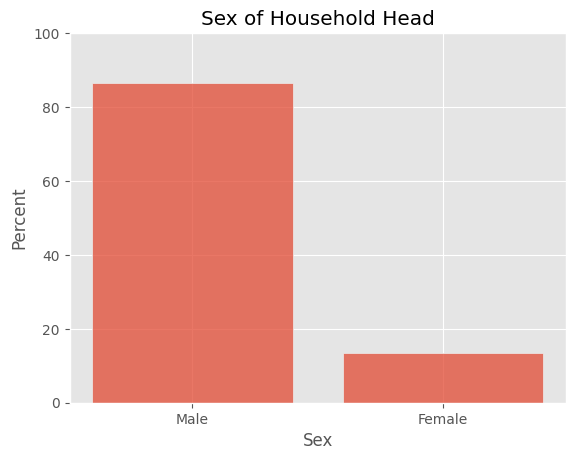

In [148]:
ax = sns.histplot(df, x='sex', 
             stat='percent', 
             weights='weight',
             shrink=0.8)
ax.set_xlabel('Sex')
ax.set_ylim(0, 100)
plt.title('Sex of Household Head');

# Education

In [149]:
# reimpose order in education categories, lost in csv format
df['education'] = pd.Categorical(df.education).reorder_categories(['Low', 'Medium', 'High'])

In [150]:
education = 100 * df.groupby('education')['weight'].sum() / df['weight'].sum()
education

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/4080952516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education = 100 * df.groupby('education')['weight'].sum() / df['weight'].sum()


education
Low       59.657914
Medium    27.160790
High      13.181295
Name: weight, dtype: float64

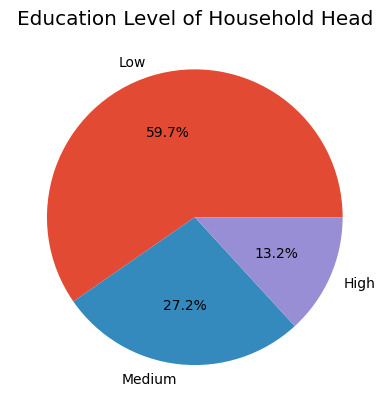

In [151]:
plt.pie(education, labels=education.index, autopct='%.1f%%')
plt.title('Education Level of Household Head');

## Education and Sex
1. Highly educated households are slightly more likely to have a Male head of household

In [152]:
education_by_sex = 100 * pd.crosstab(df.education, df.sex, df.weight, aggfunc='sum', normalize='index')
education_by_sex.reset_index(inplace=True)
education_by_sex = education_by_sex.melt(id_vars='education', value_name='Percent')
education_by_sex

,education,sex,Percent
0,Low,Female,15.381428
1,Medium,Female,11.313181
2,High,Female,9.320020
3,Low,Male,84.618572
4,Medium,Male,88.686819
5,High,Male,90.679980


Text(0.5, 1.0, 'Sex of Household Head by Education')

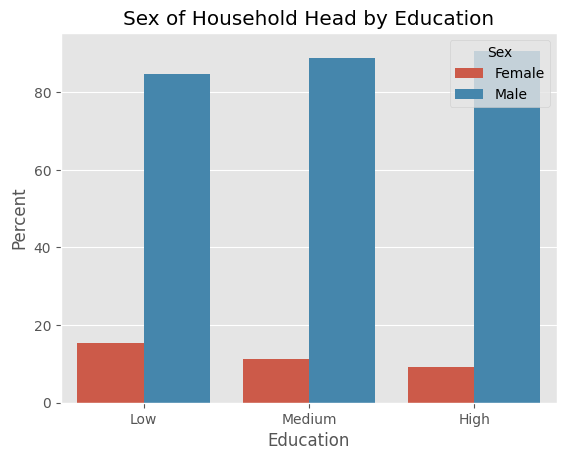

In [153]:
# unstacked barplot
sns.barplot(education_by_sex, x='education', y='Percent', hue='sex')
plt.legend(title='Sex');
plt.xlabel('Education')
plt.title('Sex of Household Head by Education')

In [154]:
education_by_sex = 100 * pd.crosstab(df.education, df.sex, df.weight, aggfunc='sum', normalize='index')
education_by_sex.reset_index(inplace=True)
education_by_sex = education_by_sex.set_index('education')
education_by_sex

sex,Female,Male
education,,
Low,15.381428,84.618572
Medium,11.313181,88.686819
High,9.320020,90.679980


Text(0, 0.5, 'Percent')

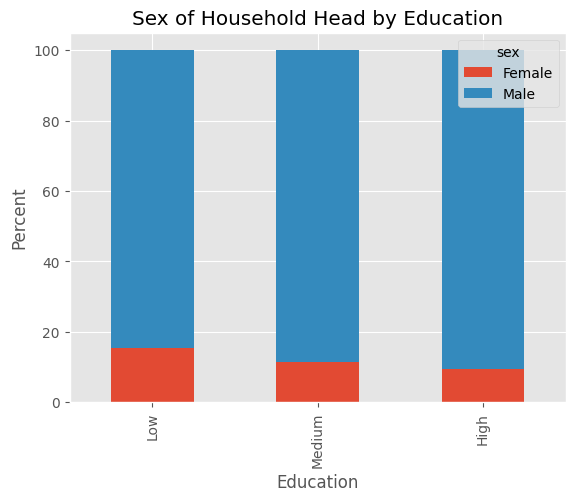

In [155]:
education_by_sex.plot(kind='bar', stacked=True)
plt.title('Sex of Household Head by Education')
plt.xlabel('Education')
plt.ylabel('Percent')


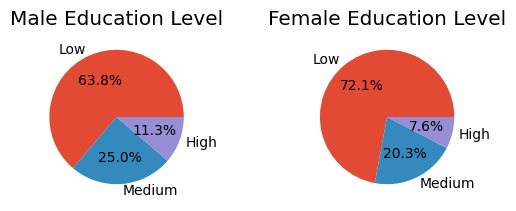

In [156]:
plt.subplot(221)
male = df.query("sex == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index], autopct='%.1f%%')
plt.title('Male Education Level')

plt.subplot(222)
female = df.query("sex == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index], autopct='%.1f%%')
plt.title('Female Education Level');

## Education and Location Size
- This section studies the relationship between education and the size of the locality a household lives in
- I consider four locality sizes: metropolitan areas, population greater than 100,000, population between 15,000 and 99,999, and population between 2,500 and 14,999
- As population increases, the households are more likely to have a medium or high level of education

In [157]:
education_by_location = 100 * pd.crosstab(df.location_size, df.education, df.weight, aggfunc='sum', normalize='index')
education_by_location.reset_index(inplace=True)
education_by_location = education_by_location.melt(id_vars='location_size', value_name='Percent')

In [158]:
location_size_labels = [
    'Metropolitan Area', 
    '>= 100,000', 
    '15,000 - 99,999', 
    '2,500 - 14,999'
]

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/3345204213.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(location_size_labels)


Text(0.5, 1.0, 'Education and Location Size')

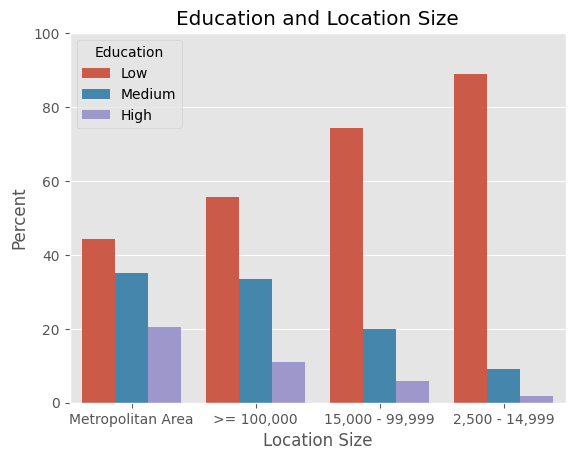

In [159]:
ax = sns.barplot(education_by_location, x='location_size', y='Percent', hue='education')
ax.legend(title='Education')

ax.set_xlabel('Location Size')
ax.set_xticklabels(location_size_labels)
ax.set_ylim(0, 100);
ax.set_title('Education and Location Size');

In [160]:
education_by_location = 100 * pd.crosstab(df.location_size, df.education, df.weight, aggfunc='sum', normalize='index')
education_by_location

education,Low,Medium,High
location_size,,,
1,44.321467,35.075416,20.603117
2,55.679965,33.340268,10.979767
3,74.359255,19.875052,5.765693
4,88.984543,9.250178,1.765279


Text(0.5, 1.0, 'Education and Location Size')

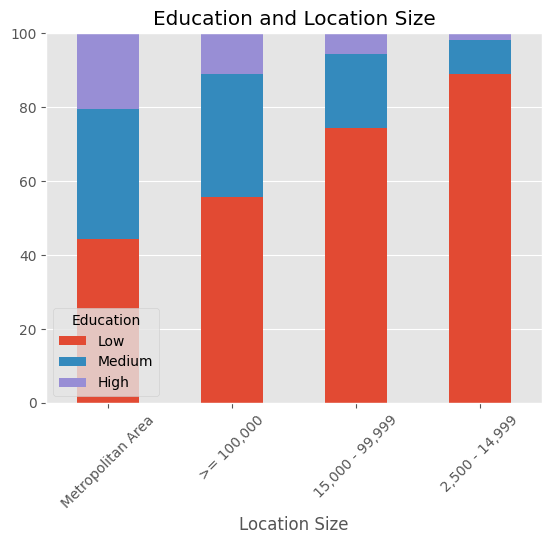

In [161]:
ax = education_by_location.plot(kind='bar', stacked=True)

ax.legend(title='Education')
ax.set_xlabel('Location Size')
ax.set_xticklabels(location_size_labels, rotation=45)
ax.set_ylim(0, 100);
ax.set_title('Education and Location Size')

## Distributions of Income and Consumption
- This figure plots the distribution of income and consumption
- As is typical, these distributions feature a large right tail

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/2838477532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income, bins=20, hist_kws={'weights':df.weight})
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/2838477532.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

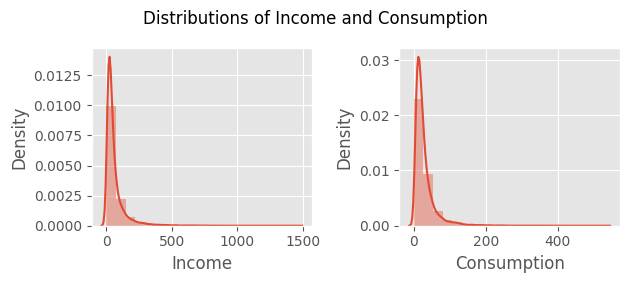

In [162]:
plt.subplot(221)
sns.distplot(df.income, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Income')

plt.subplot(222)
sns.distplot(df.consumption, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Consumption')

plt.suptitle('Distributions of Income and Consumption')

plt.tight_layout()

## Log Distributions of Income and Consumption
- Here we can see that log consumption and income are well approximated by a normal distribution

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/1896007037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income.map(np.log), bins=20, hist_kws={'weights':df.weight})
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/1896007037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

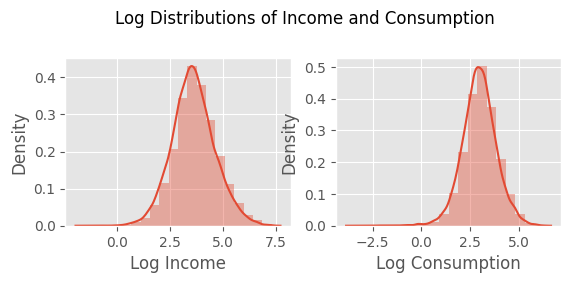

In [163]:
plt.subplot(221)
sns.distplot(df.income.map(np.log), bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Log Income')

plt.subplot(222)
sns.distplot(df.consumption.map(np.log), bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Log Consumption')

plt.suptitle('Log Distributions of Income and Consumption');

# Decomposed income
- This figure plots scatterplots for the three primary parts of our measure of income: salaried income, business income, and transfers
- Each figure features many points along the axes because a household might not earn a particular type of income
- e.g. a household earns a salary but no business income

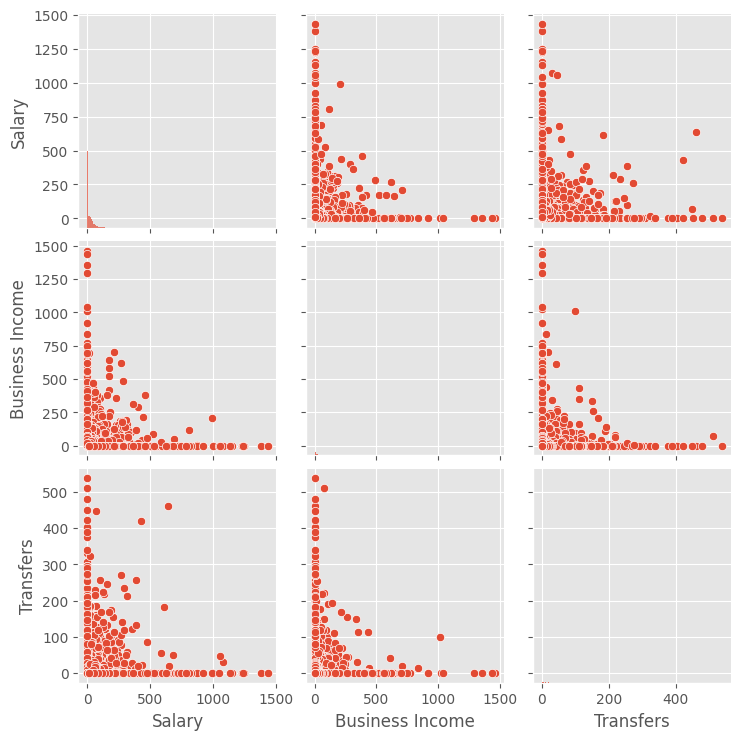

In [164]:
income_columns = ['income_salary', 'income_business', 'income_transfers']
income_labels = {
    'income_salary':'Salary',
    'income_business':'Business Income',
    'income_transfers':'Transfers'}
g = sns.pairplot(df[income_columns])

for ii in np.arange(len(income_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(income_labels[ax.get_ylabel()])

for jj in np.arange(len(income_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(income_labels[ax.get_xlabel()])

- This figure produces pair plots for the logs, which implicitly removes zero values
- We can see the positive correlation between each income type, although it features significant variance

/Users/mitch/envs/main/lib/python3.9/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


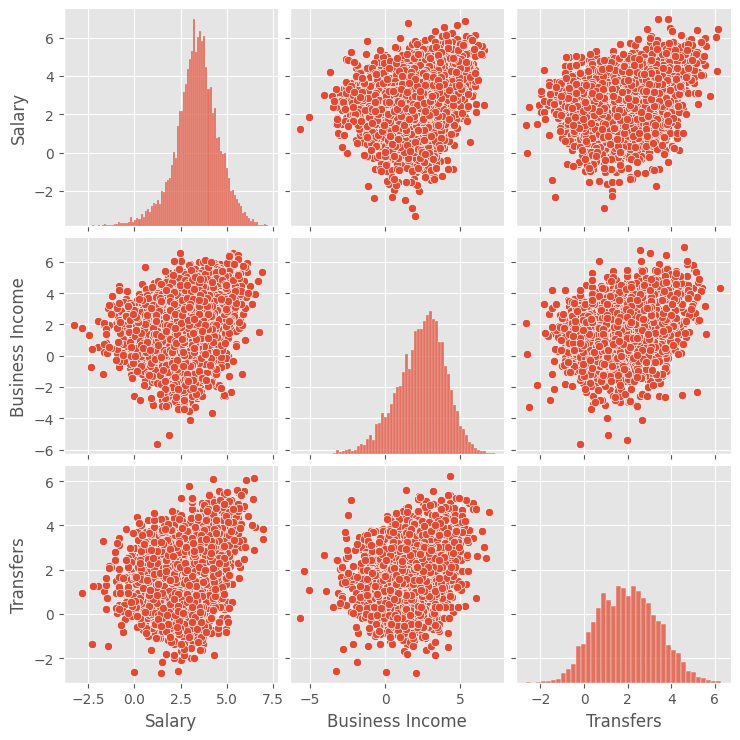

In [165]:
g = sns.pairplot(df[income_columns].map(np.log))

for ii in np.arange(len(income_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(income_labels[ax.get_ylabel()])

for jj in np.arange(len(income_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(income_labels[ax.get_xlabel()])

- The following two figures plot the correlation of each income type
- We can see that we include zero values the correlation is small
- When we restrict values to be positive the correlation is much larger

<Axes: >

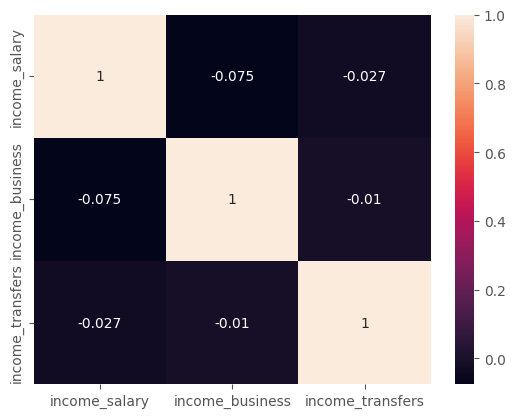

In [166]:
sns.heatmap(df[income_columns].corr(), annot=True)

<Axes: >

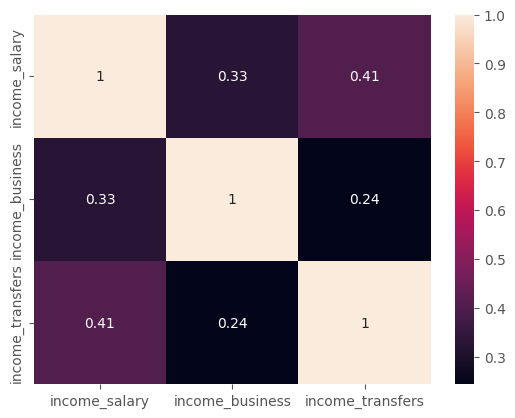

In [167]:
aux = df[income_columns]
aux = aux[aux > 0]
sns.heatmap(aux.corr(), annot=True)

## Decomposed Consumption
1. This figure plots scatter plots for total consumption and its components

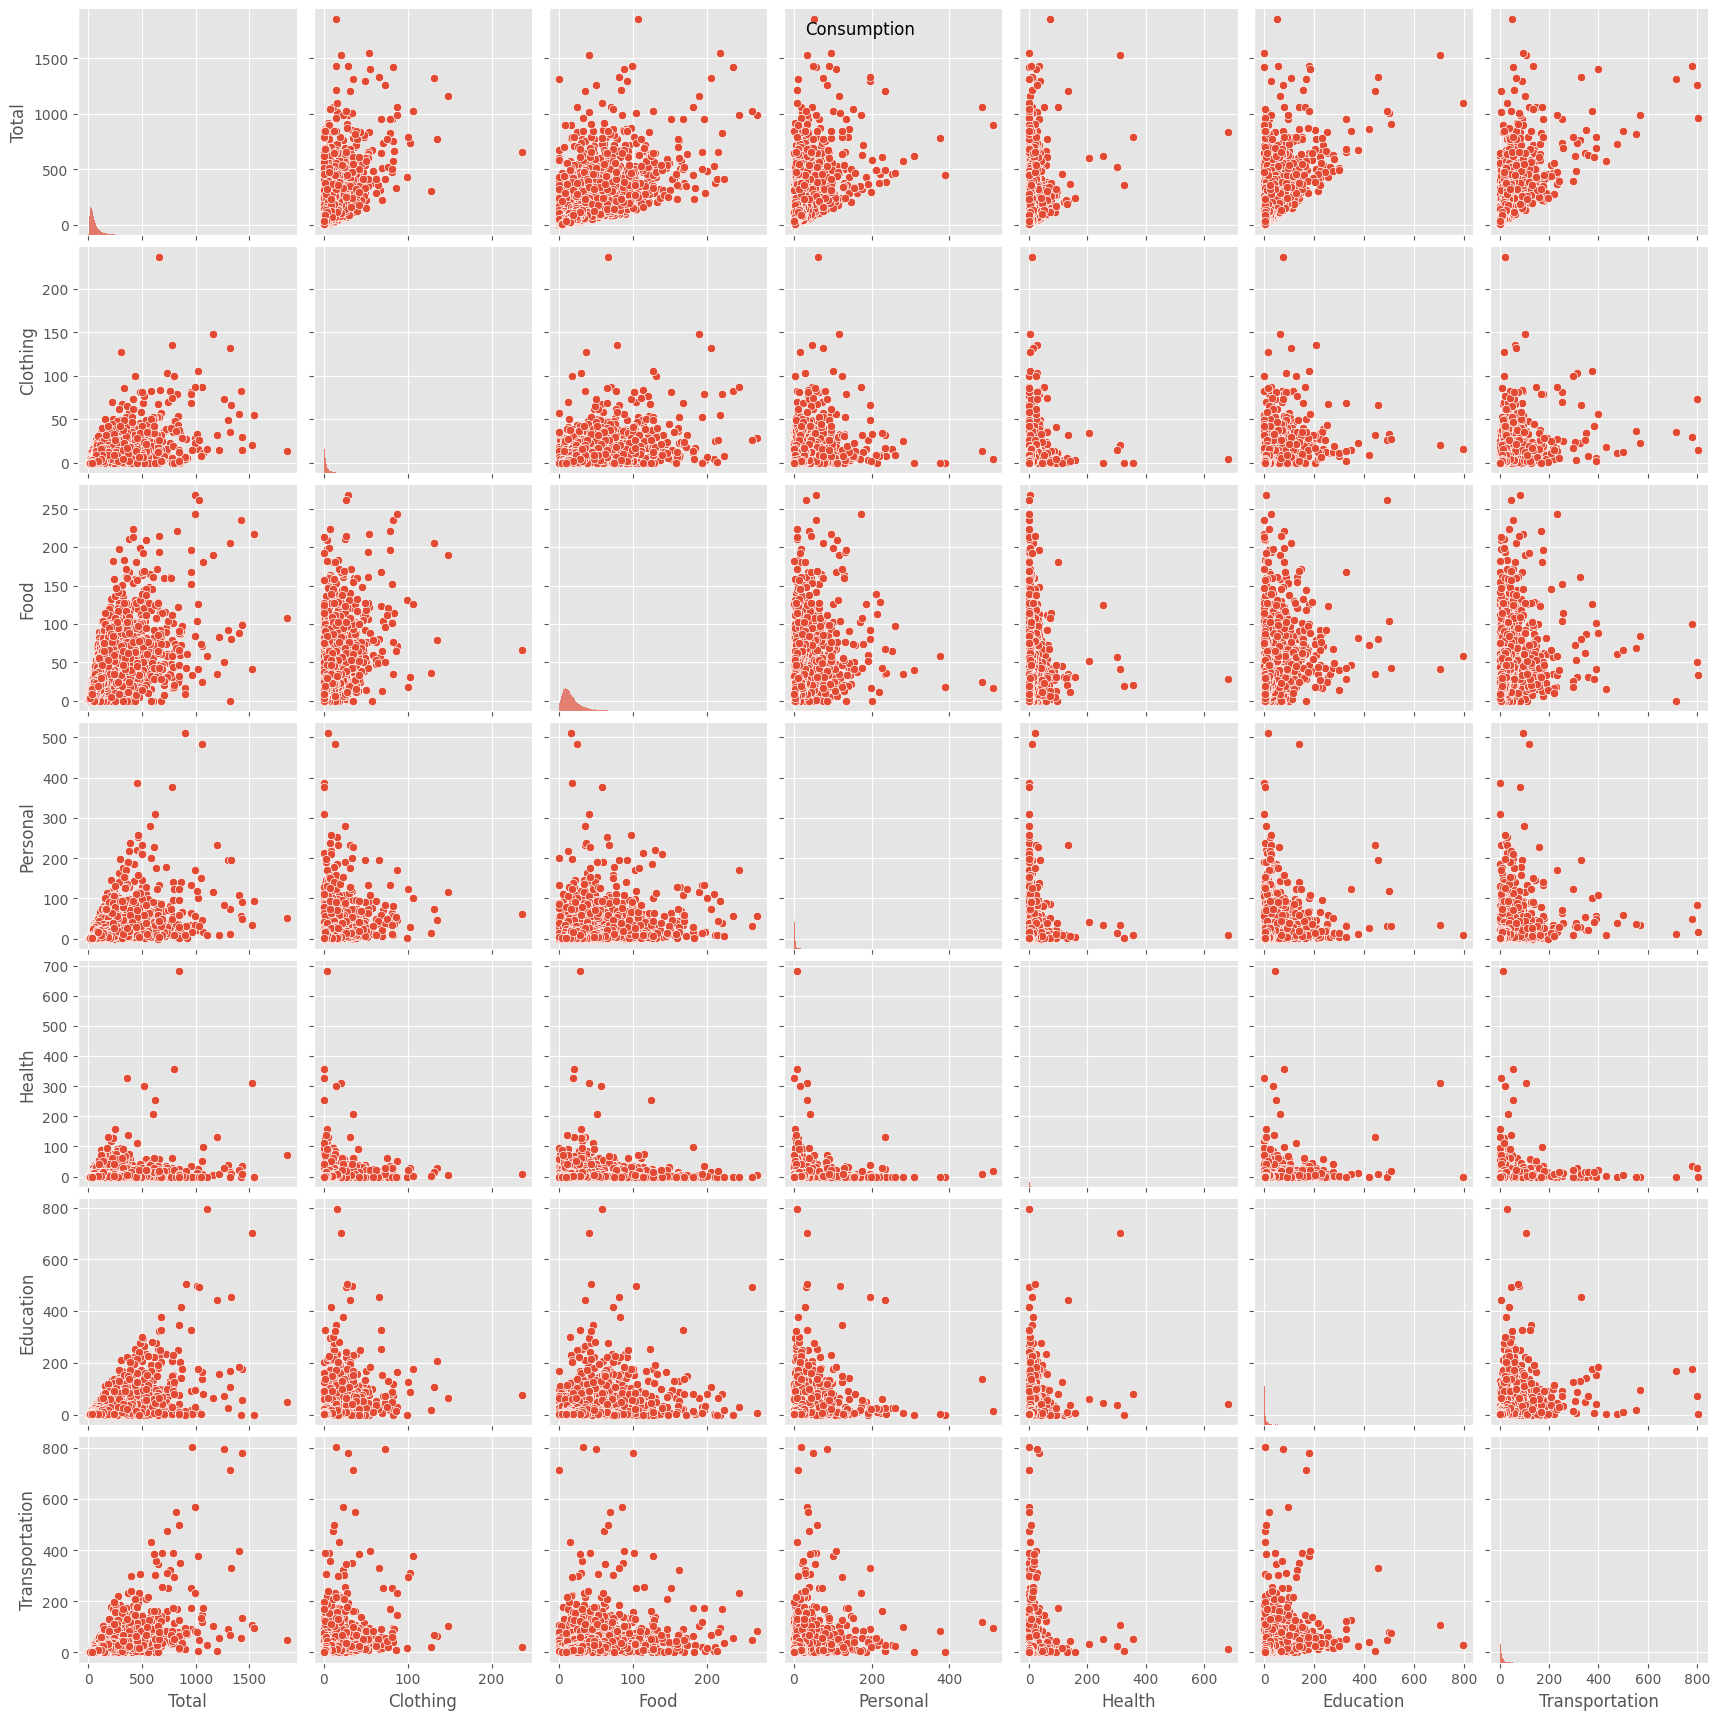

In [168]:
consumption_columns = ['consumption_current', 'consumption_clothing', 'consumption_food', 'consumption_personal', 'consumption_health', 'consumption_education', 'consumption_transportation']
consumption_labels = {
    'consumption_current':'Total',
                       'consumption_clothing':'Clothing',
                       'consumption_food':'Food',
                       'consumption_personal':'Personal',
                       'consumption_health':'Health',
                       'consumption_education':'Education',
                       'consumption_transportation':'Transportation'
                       }
g = sns.pairplot(df[consumption_columns])
plt.suptitle('Consumption')

for ii in np.arange(len(consumption_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(consumption_labels[ax.get_ylabel()])

for jj in np.arange(len(consumption_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(consumption_labels[ax.get_xlabel()])

### Decomposed Consumption: Log Levels
- This figure plots scatter plots for the log levels of different consumption components
- We observe an increasing relationship between each component of consumption

/Users/mitch/envs/main/lib/python3.9/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


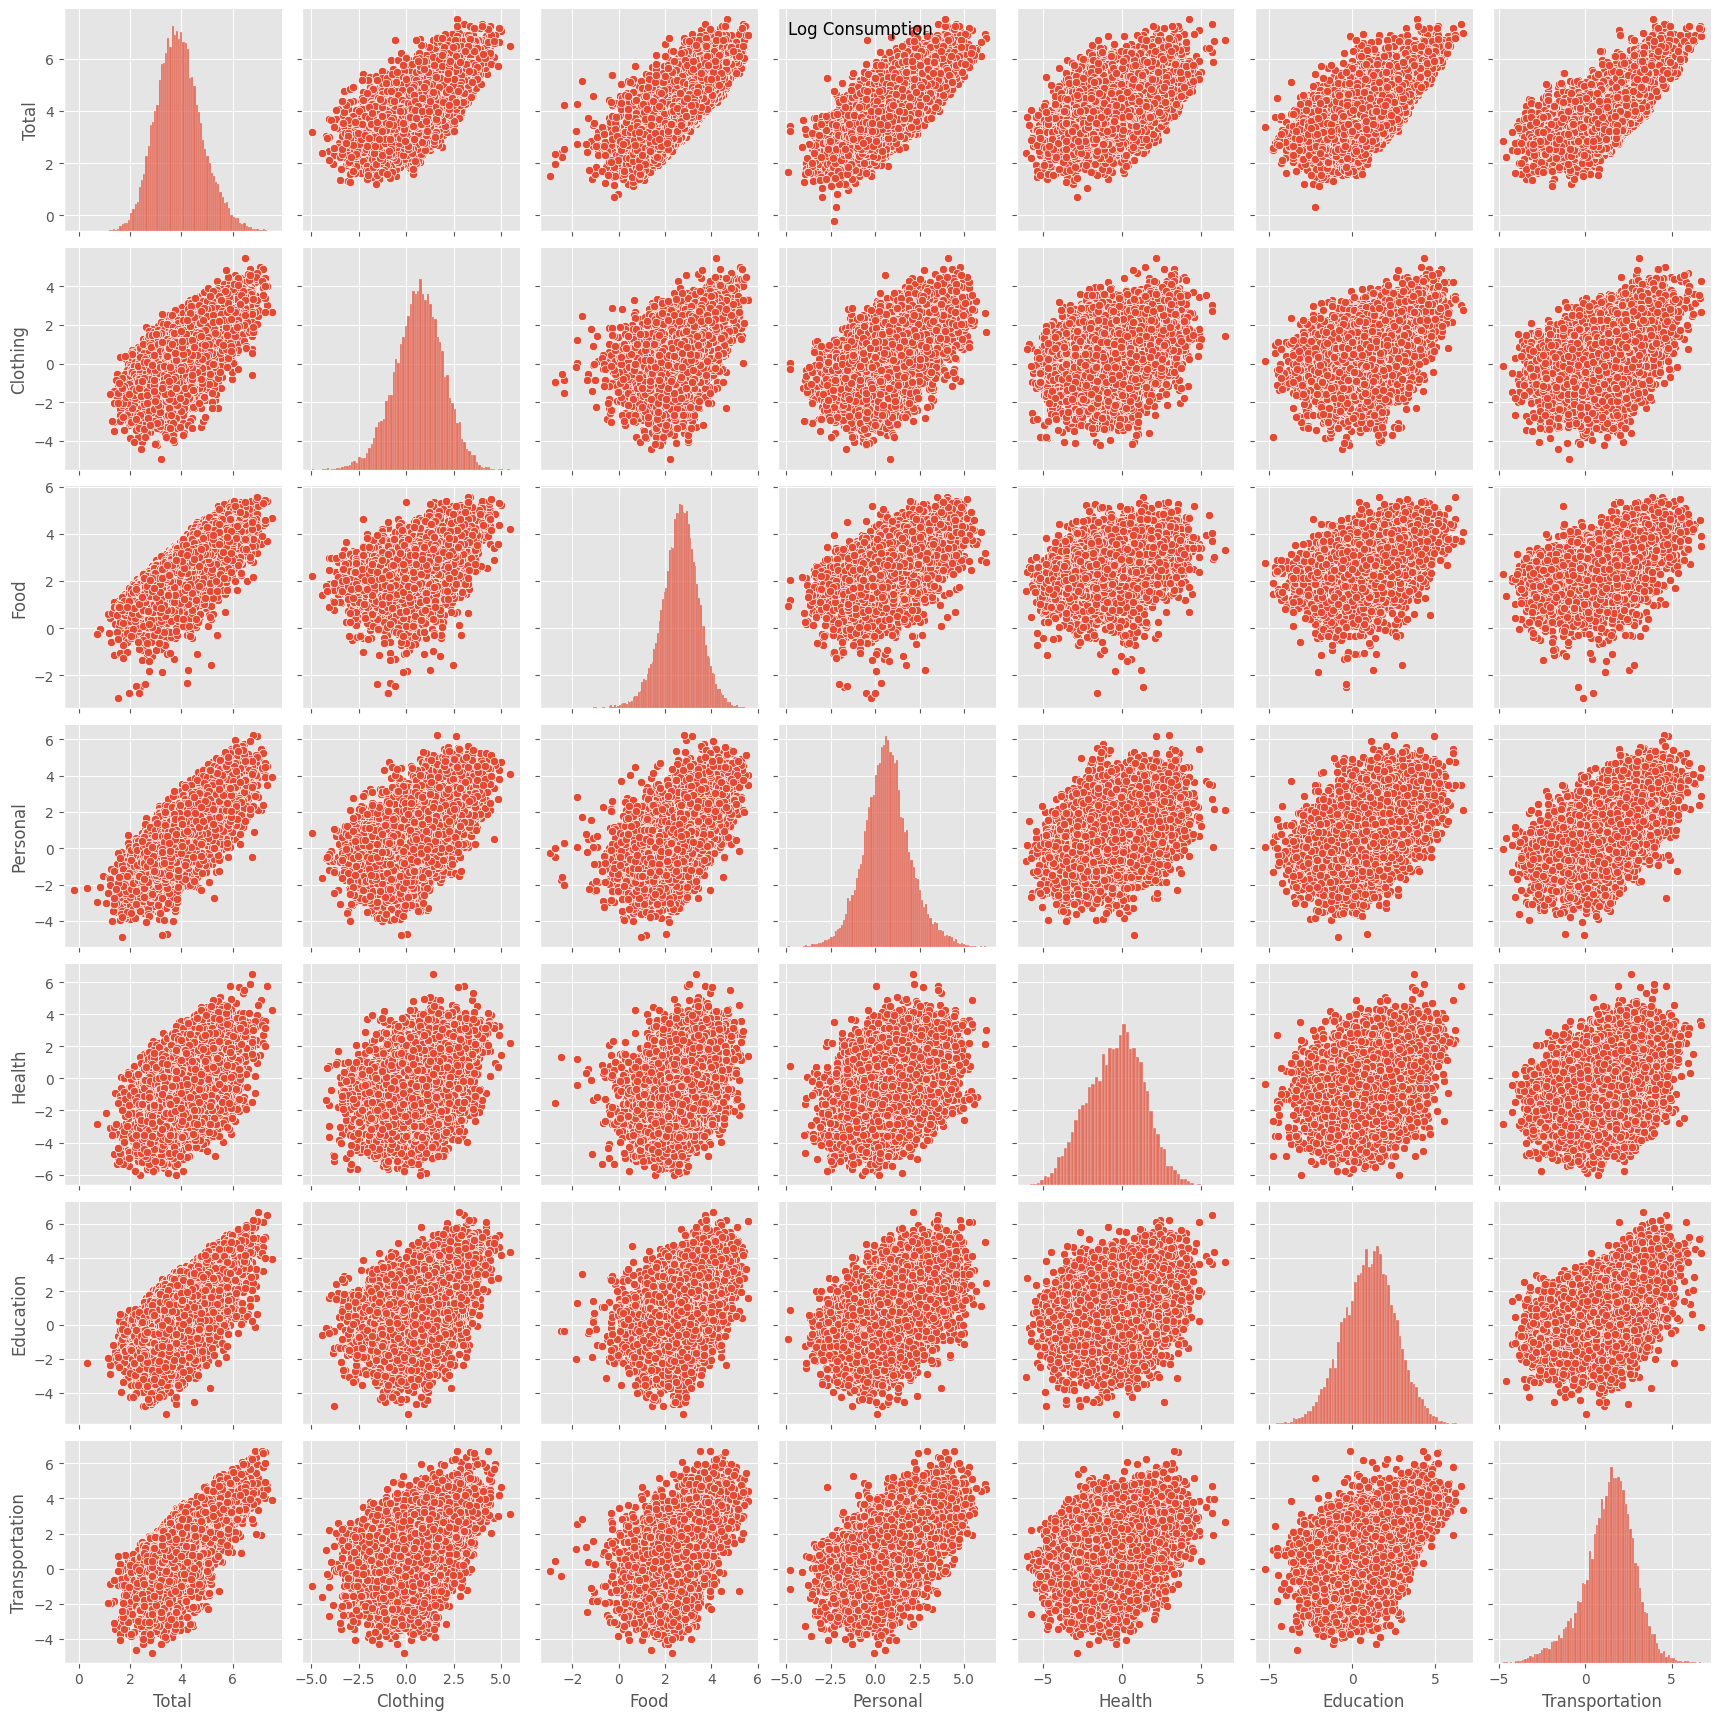

In [169]:
g = sns.pairplot(df[consumption_columns].map(np.log))
plt.suptitle('Log Consumption')

for ii in np.arange(len(consumption_columns)):
    ax = g.axes[ii, 0]
    ax.set_ylabel(consumption_labels[ax.get_ylabel()])

for jj in np.arange(len(consumption_columns)):
    ax = g.axes[-1, jj]
    ax.set_xlabel(consumption_labels[ax.get_xlabel()])

- We observe a positive correlation between each consumption type
- Health expenditures have the weakest correlation

<Axes: >

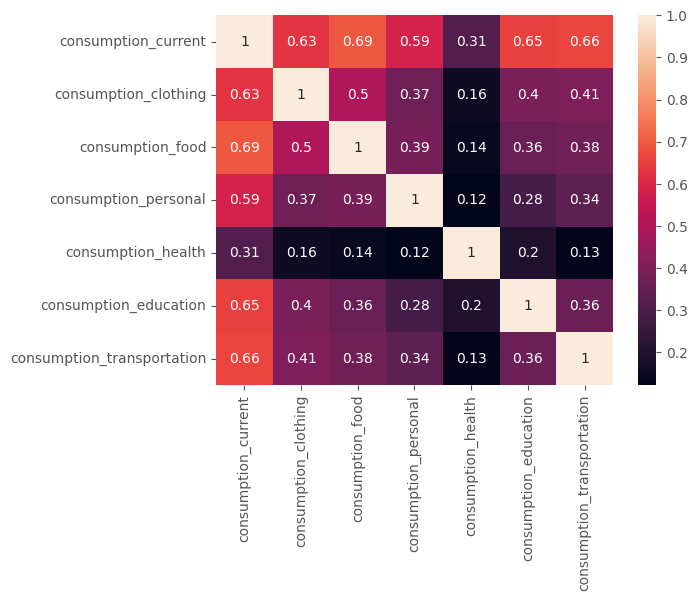

In [170]:
sns.heatmap(df[consumption_columns].corr(), annot=True)

# Age
- This section characterizes the age distribution of household heads
- The majority of household heads are in their thirties, with less household heads in their fifties

In [171]:
agebins = np.arange(df.age.min(), df.age.max()+5, 5)

# this forces the final bin to be inclusive of the maximum age
agebins[-1] = df.age.max()+1

df['age_bin'] = pd.cut(df['age'], agebins, right=False)
binsize = 100*df.groupby('age_bin')['weight'].sum() / df['weight'].sum()
bin_labels = [str(x.left) + '-' + str(x.right-1) for x in binsize.index]
binsize

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/2177885908.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binsize = 100*df.groupby('age_bin')['weight'].sum() / df['weight'].sum()


age_bin
[25, 30)    13.823071
[30, 35)    17.542498
[35, 40)    17.609791
[40, 45)    15.085659
[45, 50)    13.085999
[50, 55)    11.392006
[55, 61)    11.460976
Name: weight, dtype: float64

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_13698/1142002347.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bin_labels);


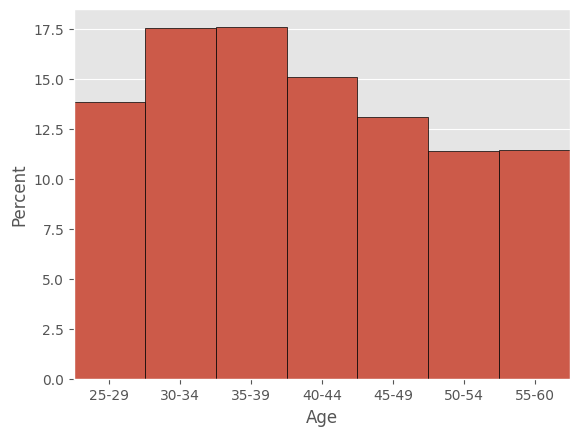

In [172]:
ax = sns.barplot(x=binsize.index, y=binsize.values, 
            edgecolor='black', width=1.0
            )
ax.set_xticklabels(bin_labels);

ax.set_xlabel('Age')
ax.set_ylabel('Percent');

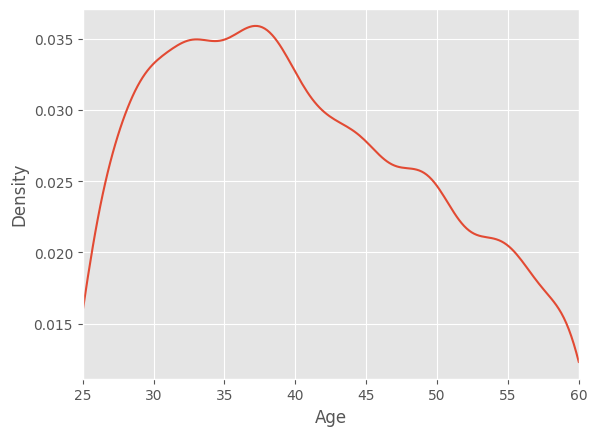

In [173]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age');

In [181]:
age_by_education = 100 * pd.crosstab(df.age_bin, df.education, df.weight, aggfunc='sum', normalize='index')
age_by_education

education,Low,Medium,High
age_bin,,,
"[25, 30)",38.917940,47.615255,13.466806
"[30, 35)",44.478423,39.630225,15.891352
"[35, 40)",54.127890,27.354905,18.517205
"[40, 45)",63.667954,22.081477,14.250568
"[45, 50)",69.333995,19.687298,10.978707
"[50, 55)",76.218885,14.328356,9.452760
"[55, 61)",83.615818,11.080417,5.303765


In [188]:
pd.pivot_table(df, 'weight', index='age_bin', columns='education', aggfunc='sum')

education,Low,Medium,High
age_bin,,,
"[25, 30)",1648518.0,2016926.0,570438.0
"[30, 35)",2391003.0,2130381.0,854263.0
"[35, 40)",2920886.0,1476144.0,999238.0
"[40, 45)",2943232.0,1020779.0,658773.0
"[45, 50)",2780305.0,789464.0,440248.0
"[50, 55)",2660738.0,500191.0,329988.0
"[55, 61)",2936631.0,389150.0,186271.0


## Education and Age
- This figure decomposes the distribution of education within each age bin
- We can see that younger generations have higher levels of education that older generations
- However, high educatino peaks in the 35-39 age bin
- Presumably, this happens because it takes time to acquire higher education levels

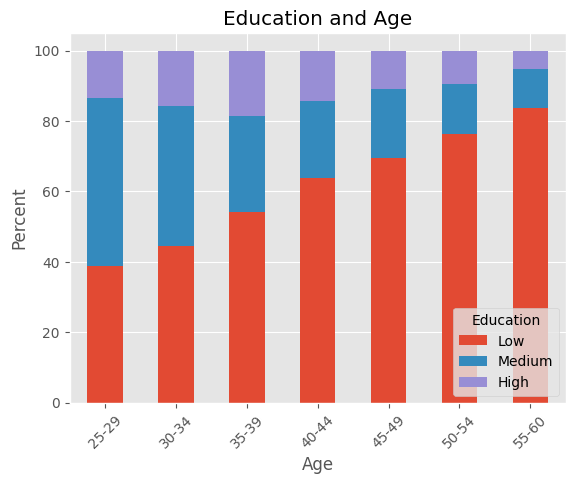

In [184]:
ax = age_by_education.plot(kind='bar', stacked=True)
ax.set_xticklabels(bin_labels, rotation=45);
ax.legend(title='Education', loc='lower right')
ax.set_xlabel('Age')
ax.set_ylabel('Percent')
plt.title('Education and Age');